In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset.csv',encoding='latin1')

In [4]:
df.fillna(method='ffill',inplace=True)

C:\Users\Tuhin\AppData\Local\Temp\ipykernel_11856\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [5]:
words = list(set(df['Word'].values))
words.append('ENDPAD')
num_word=len(words)

In [6]:
tags = list(set(df['Tag'].values))
num_tag= len(tags)

In [7]:
class SentenceRetreival:
  def __init__(self,data):
    self.n_sent = 1
    self.data = data
    self.aggr_func = lambda s: [(w,p,t) for w,p,t in zip(s['Word'].values.tolist(),s['POS'].values.tolist(),s['Tag'].values.tolist())]


    self.grouped = self.data.groupby('Sentence #').apply(self.aggr_func)

    self.sentence = [s for s in self.grouped]



In [8]:
retrieved_data = SentenceRetreival(df)
sentences = retrieved_data.sentence

C:\Users\Tuhin\AppData\Local\Temp\ipykernel_11856\1213471347.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby('Sentence #').apply(self.aggr_func)


In [9]:
wordtoidx = {w: i+1 for i,w in enumerate(words)}
tagtoidx = {t: i for i, t in enumerate(tags)}


In [11]:
tagtoidx

{'I-tim': 0,
 'I-nat': 1,
 'B-nat': 2,
 'B-per': 3,
 'I-art': 4,
 'I-per': 5,
 'O': 6,
 'I-gpe': 7,
 'I-eve': 8,
 'I-geo': 9,
 'B-tim': 10,
 'I-org': 11,
 'B-art': 12,
 'B-geo': 13,
 'B-eve': 14,
 'B-gpe': 15,
 'B-org': 16}

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([1.300e+01, 1.800e+02, 7.030e+02, 1.363e+03, 2.152e+03, 2.803e+03,
        3.496e+03, 3.965e+03, 4.559e+03, 4.849e+03, 4.706e+03, 4.447e+03,
        3.814e+03, 3.117e+03, 2.433e+03, 1.699e+03, 1.767e+03, 6.490e+02,
        4.720e+02, 2.660e+02, 1.710e+02, 1.050e+02, 7.300e+01, 5.900e+01,
        2.400e+01, 1.800e+01, 2.100e+01, 6.000e+00, 9.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.06,   5.12,   7.18,   9.24,  11.3 ,  13.36,  15.42,
         17.48,  19.54,  21.6 ,  23.66,  25.72,  27.78,  29.84,  31.9 ,
         33.96,  36.02,  38.08,  40.14,  42.2 ,  44.26,  46.32,  48.38,
         50.44,  52.5 ,  54.56,  56.62,  58.68,  60.74,  62.8 ,  64.86,
         66.92,  68.98,  71.04,  73.1 ,  75.16,  77.22,  79.28,  81.34,
         83.4 , 

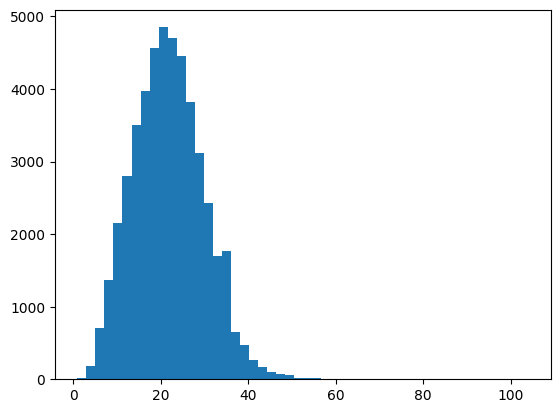

In [11]:
plt.hist([len(s) for s in sentences],bins=50)

In [22]:
from tensorflow.keras.utils import pad_sequences , to_categorical

In [14]:
X = [[wordtoidx[w[0]] for w in s]for s in sentences]
X = pad_sequences(X,maxlen=50,padding='post',value=num_word-1)

In [23]:
y = [[tagtoidx[w[2]] for w in s] for s in sentences]
y = pad_sequences(y, maxlen=50, padding='post',value=tagtoidx['O'])
y = [to_categorical(i,num_classes=num_tag) for i in y]

In [37]:
from tensorflow.keras.layers import SpatialDropout1D, Embedding, Dense, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras import Model , Input
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.1,random_state=2)

In [39]:
input_word = Input(shape=(50,))

model = Embedding(input_dim=num_word,output_dim=50,input_length=50) (input_word)
model = SpatialDropout1D(0.1) (model)
model = Bidirectional(LSTM(units=100,return_sequences=True,recurrent_dropout=0.1)) (model)

out = TimeDistributed(Dense(num_tag,activation='softmax')) (model)

model = Model(input_word, out)
model.summary()

c:\Users\Tuhin\OneDrive\Desktop\NER_LSTM\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 50, 50)         │     1,758,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 50, 50)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50, 200)        │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 50, 17)         │         3,417 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,883,117 (7.18 MB)

 Trainable params: 1,883,117 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
import numpy as np
history = model.fit(X_train,np.array(y_train),epochs=2,validation_split=0.2)

Epoch 1/2
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 106s 91ms/step - accuracy: 0.9606 - loss: 0.1634 - val_accuracy: 0.9810 - val_loss: 0.0665
Epoch 2/2
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 96s 89ms/step - accuracy: 0.9847 - loss: 0.0515 - val_accuracy: 0.9845 - val_loss: 0.0509


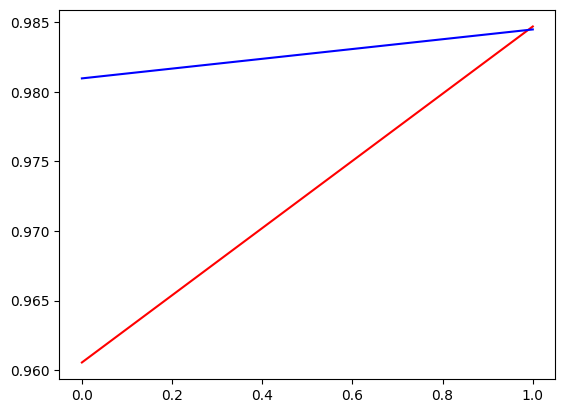

In [43]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

plt.show()

In [44]:
model.evaluate(X_test, np.array(y_test))

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9850 - loss: 0.0497


[0.04969598352909088, 0.9850463271141052]